c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


            Bubble Sort  Insertion Sort  Merge Sort  Quick Sort  Heap Sort
Input Size                                                                
4000           2.306925        1.142684    0.034301    0.020276   0.043002
5000           3.677762        1.720325    0.035498    0.024413   0.047129
6000           4.699244        1.806530    0.030613    0.016973   0.047499


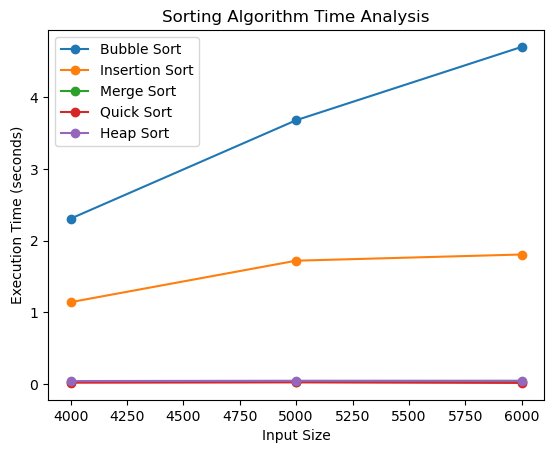

In [1]:
import random, time
import matplotlib.pyplot as plt

# Sorting algorithms
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        merge_sort(L)
        merge_sort(R)
        i=j=k=0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]; i+=1
            else:
                arr[k] = R[j]; j+=1
            k+=1
        while i < len(L):
            arr[k] = L[i]; i+=1; k+=1
        while j < len(R):
            arr[k] = R[j]; j+=1; k+=1

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def heapify(arr, n, i):
    largest = i
    l, r = 2*i+1, 2*i+2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n//2-1, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, i, 0)

# Run experiments
sizes = [4000, 5000, 6000]
algorithms = {
    "Bubble Sort": bubble_sort,
    "Insertion Sort": insertion_sort,
    "Merge Sort": merge_sort,
    "Quick Sort": lambda arr: quick_sort(arr),  # quick_sort returns new arr
    "Heap Sort": heap_sort
}

results = {alg: [] for alg in algorithms}

for size in sizes:
    data = [random.randint(0, 10000) for _ in range(size)]
    for name, func in algorithms.items():
        arr = data.copy()
        start = time.perf_counter()
        if name == "Quick Sort":
            arr = func(arr)  # quick_sort returns new arr
        else:
            func(arr)
        end = time.perf_counter()
        results[name].append(end - start)

# Display results
import pandas as pd
df = pd.DataFrame(results, index=sizes)
df.index.name = "Input Size"
print(df)

# Plot
for name, times in results.items():
    plt.plot(sizes, times, marker='o', label=name)
plt.xlabel("Input Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Sorting Algorithm Time Analysis")
plt.legend()
plt.show()


In [2]:
import random
import time
from datetime import datetime

# -----------------------------
# Sorting algorithms (5 total)
# -----------------------------

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        # Last i elements are already in place
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:  # Early exit if already sorted
            break

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge_sort(arr):
    # Top-down recursive merge sort
    if len(arr) <= 1:
        return
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    merge_sort(left)
    merge_sort(right)
    i = j = k = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            arr[k] = left[i]; i += 1
        else:
            arr[k] = right[j]; j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]; i += 1; k += 1
    while j < len(right):
        arr[k] = right[j]; j += 1; k += 1

def _partition(arr, lo, hi):
    # Randomized Lomuto partition
    p = random.randint(lo, hi)
    arr[p], arr[hi] = arr[hi], arr[p]
    pivot = arr[hi]
    i = lo
    for j in range(lo, hi):
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[hi] = arr[hi], arr[i]
    return i

def quick_sort(arr):
    # Iterative (stack-based) in-place quicksort
    if len(arr) <= 1:
        return
    stack = [(0, len(arr) - 1)]
    while stack:
        lo, hi = stack.pop()
        if lo < hi:
            p = _partition(arr, lo, hi)
            # Push larger partition first to keep stack shallow
            if (p - 1 - lo) > (hi - (p + 1)):
                stack.append((lo, p - 1))
                stack.append((p + 1, hi))
            else:
                stack.append((p + 1, hi))
                stack.append((lo, p - 1))

def _heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        _heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        _heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        _heapify(arr, i, 0)

# ---------------------------------------
# Benchmark runner (prints start & end)
# ---------------------------------------

def run_benchmark(sizes=(4000, 5000, 6000), seed=42):
    random.seed(seed)

    algorithms = [
        ("Bubble Sort", bubble_sort),
        ("Insertion Sort", insertion_sort),
        ("Merge Sort", merge_sort),
        ("Quick Sort", quick_sort),
        ("Heap Sort", heap_sort),
    ]

    # Header
    print("=" * 110)
    print(f"{'Algorithm':<16} {'N':>6}  {'Start (local wall clock)':<27} {'End (local wall clock)':<27} {'Start(perf)':>12} {'End(perf)':>12} {'Elapsed(s)':>12}  {'OK?':>4}")
    print("-" * 110)

    for n in sizes:
        # Generate identical base data for all algorithms at size n
        base = [random.randint(0, 10_000_000) for _ in range(n)]
        # Precompute the correct sorted result once per size (not timed with the algorithm)
        golden = sorted(base)

        for name, func in algorithms:
            arr = base.copy()

            wall_start = datetime.now()
            perf_start = time.perf_counter()

            func(arr)  # in-place for all 5

            perf_end = time.perf_counter()
            wall_end = datetime.now()

            elapsed = perf_end - perf_start
            ok = "YES" if arr == golden else "NO"

            # Pretty print a compact row (perf counters rounded to microseconds)
            print(
                f"{name:<16} {n:>6}  "
                f"{wall_start.strftime('%H:%M:%S.%f')[:-3]:<27} "
                f"{wall_end.strftime('%H:%M:%S.%f')[:-3]:<27} "
                f"{perf_start:>12.6f} {perf_end:>12.6f} {elapsed:>12.6f}  {ok:>4}"
            )
        print("-" * 110)
    print("=" * 110)

if __name__ == "__main__":
    run_benchmark(sizes=(4000, 5000, 6000))


Algorithm             N  Start (local wall clock)    End (local wall clock)       Start(perf)    End(perf)   Elapsed(s)   OK?
--------------------------------------------------------------------------------------------------------------
Bubble Sort        4000  11:24:58.251                11:25:02.305                97970.272791 97974.326433     4.053642   YES
Insertion Sort     4000  11:25:02.306                11:25:03.274                97974.326854 97975.295210     0.968356   YES
Merge Sort         4000  11:25:03.274                11:25:03.296                97975.295447 97975.317923     0.022475   YES
Quick Sort         4000  11:25:03.296                11:25:03.315                97975.318044 97975.336918     0.018874   YES
Heap Sort          4000  11:25:03.315                11:25:03.360                97975.337069 97975.381432     0.044363   YES
--------------------------------------------------------------------------------------------------------------
Bubble Sort        500